# Phase 1 Project

* Student Name: Damaris Wanjiru
* Student Pace: Full Time
* Instructor Name: Lucille Kaleha
* Tableau Public:

# Project Overview
The main goal of this project is to conduct a comprehensive analysis of historical aviation incident data, with the purpose of identifying aircraft models that pose lower risk. This analysis will also provide detailed, actionable insights into the underlying factors that contribute to aviation incidents, such as technical failures, human errors, or environmental conditions. By thoroughly understanding these contributing factors, the company will be better equipped to make informed decisions on which aircraft to acquire. Additionally, these insights will help in developing targeted strategies and safety protocols to proactively minimize operational risks and enhance overall aviation safety in future once they acquire the aircraft

# Business Understanding
Our company wants to expand into the aviation sector by buying and operating aircraft for commercial and private use. However, we lack knowledge about the risks involved with aircraft. The task is to identify the types of aircraft that carry the least risk. Then, present the findings in a clear way to help the management of the new aviation division decide which aircraft to purchase.

# Problem Statement
The company faces challenges in selecting safe aircraft models due to a lack of clear insights from historical incident data. Without a thorough analysis of past incidents, including their causes and contributing factors, the company risks acquiring aircraft that may lead to safety issues. This uncertainty can hinder effective risk management and safety improvements. To enhance decision-making and operational safety, the company needs to identify the safest aircraft options and develop strategies to mitigate potential risks.

# Objectives
* Trend Analysis Investigate trends over the years
* Identify Safe Aircraft Models and make based on injuries and accidents rates across different aircraft models and make
* Assess the effects the weather conditions has on the rate of accidents
* Evaluate at what phase of the flight has higher rate of accidents and incident
* Determine the geographical locations where accidents are most frequently reported.
* Analyze the relationship between the number of engines on an aircraft and the incidence of accidents.
 

# Data Understanding and Analysis
Data The dataset we are using for this project is drawn from kaggle.com gotteen from National Transportation Safety Board. The aviation accident database provides information on civil aviation accidents and select incidents dating back to 1962 to 2023 encompassing the United States, its territories, and international waters.

## Data Preparation 

* Load the data
* Data inspection 
* Check for duplicates and missing values
* Handling of missing values
* Fix any other error

## Importing the relevant libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt    
%matplotlib inline

## Loading the data

In [2]:
# loading the data
AviationData = pd.read_csv(r"C:\Users\Damaris\Desktop\AviationData.csv", encoding='latin1',low_memory=False)
aviation_data = AviationData

In [3]:
# Display maximum number of columns
pd.set_option("display.max_columns",100)
aviation_data.head()        # Display the five rows of the dataset

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
4,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
# Shape of the dataset shows the number of rows and columns
print(f"This dataset has {aviation_data.shape[0]} rows and {aviation_data.shape[1]} columns.")

This dataset has 88889 rows and 31 columns.


In [5]:
#Statistical summary for categorical columns
aviation_data.describe(include=object).T

,count,unique,top,freq
Event.Id,88889,84468,2.02207E+13,190
Investigation.Type,88889,2,Accident,85015
Accident.Number,88889,88863,ERA22LA103,2
Event.Date,88889,14782,5/16/1982,25
Location,88837,27758,"ANCHORAGE, AK",434
Country,88663,219,United States,82248
Latitude,34382,25589,332739N,19
Longitude,34373,27154,0112457W,24
Airport.Code,50132,10356,NONE,1488
Airport.Name,52704,24869,Private,240


In [6]:
# Statistical summary for numerical dataset
aviation_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


In [7]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [8]:
# Inspect the columns
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [9]:
# Replace "." with "-" and convert column names to lowercase in one line
aviation_data.columns = [col.replace('.', '-').lower() for col in aviation_data.columns]
aviation_data.head(2)

,event-id,investigation-type,accident-number,event-date,location,country,latitude,longitude,airport-code,airport-name,injury-severity,aircraft-damage,aircraft-category,registration-number,make,model,amateur-built,number-of-engines,engine-type,far-description,schedule,purpose-of-flight,air-carrier,total-fatal-injuries,total-serious-injuries,total-minor-injuries,total-uninjured,weather-condition,broad-phase-of-flight,report-status,publication-date
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996


### Load the Us Codes


In [10]:
# Loading the us states code they will be used in visualizing the location
state_codes = pd.read_csv(r"C:\Users\Damaris\Desktop\USState_Codes.csv", encoding="latin1", low_memory=False)


In [11]:
# Shows the first 5 and last 5
print("The first five",state_codes.head())
print("The last five",state_codes.tail())

The first five      US_State Abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA
The last five           US_State Abbreviation
57  Virgin Islands           VI
58   Washington_DC           DC
59  Gulf of mexico           GM
60  Atlantic ocean           AO
61   Pacific ocean           PO


In [12]:
# Inspecting the sstate_codes dataset
print(state_codes.info())
print(f"This Dataset has {state_codes.shape[0]}  rows and {state_codes.shape[1]} columns")
state_codes.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB
None
This Dataset has 62  rows and 2 columns


,count,unique,top,freq
US_State,62,62,Alabama,1
Abbreviation,62,62,AL,1


In [13]:
# save the states codes and make a copy

### Data Cleaning and Checkig for Missing Values

In [14]:
# check for duplicates
print(f"We have {aviation_data.duplicated().sum()} duplicates in this dataset")

We have 0 duplicates in this dataset


In [15]:
# Make a copy before uttering the data
aviation_data_uncleaned = aviation_data.copy()

In [16]:
# Check for missing values

aviation_data.isna().sum()

event-id                      0
investigation-type            0
accident-number               0
event-date                    0
location                     52
country                     226
latitude                  54507
longitude                 54516
airport-code              38757
airport-name              36185
injury-severity            1000
aircraft-damage            3194
aircraft-category         56602
registration-number        1382
make                         63
model                        92
amateur-built               102
number-of-engines          6084
engine-type                7096
far-description           56866
schedule                  76307
purpose-of-flight          6192
air-carrier               72241
total-fatal-injuries      11401
total-serious-injuries    12510
total-minor-injuries      11933
total-uninjured            5912
weather-condition          4492
broad-phase-of-flight     27165
report-status              6384
publication-date          13771
dtype: i

The above shows that there are a lot of missing data and some columns have more than half of the rows with missing data.


#### Percentage of Null values

In [17]:
# Calculate null percentage
null_percentage = [(col, (aviation_data[col].isna().sum() / len (aviation_data)) * 100) for col in aviation_data.columns]
# create a Dataframe from the null_percentageabs
null_percentages_df = pd.DataFrame(null_percentage, columns = ["Column", "Null_Percentage"])
# Sort in a descending order  
null_percentages_df = null_percentages_df.sort_values(by="Null_Percentage", ascending = False)
# print the sorted dataframe
null_percentages_df

,Column,Null_Percentage
20,schedule,85.845268
22,air-carrier,81.271023
19,far-description,63.974170
12,aircraft-category,63.677170
7,longitude,61.330423
6,latitude,61.320298
8,airport-code,43.601570
9,airport-name,40.708074
28,broad-phase-of-flight,30.560587
30,publication-date,15.492356


I have chosen to eliminate columns with null values exceeding 35% to ensure the reliability of my results.


#### Dropping Columns with Null_Percentages above 35%

In [18]:
# Filter columns to drop with null percentage of above 35%
columns_to_drop = null_percentages_df[null_percentages_df["Null_Percentage"] > 35]["Column"]
aviation_data_df = aviation_data.drop(columns=columns_to_drop)

# Display the cleaned DataFrame and the columns dropped
print("Columns dropped:", columns_to_drop.tolist())
print("Cleaned Dataframe shape:", aviation_data_df.shape)
aviation_data_df.head(3)

Columns dropped: ['schedule', 'air-carrier', 'far-description', 'aircraft-category', 'longitude', 'latitude', 'airport-code', 'airport-name']
Cleaned Dataframe shape: (88889, 23)


,event-id,investigation-type,accident-number,event-date,location,country,injury-severity,aircraft-damage,registration-number,make,model,amateur-built,number-of-engines,engine-type,purpose-of-flight,total-fatal-injuries,total-serious-injuries,total-minor-injuries,total-uninjured,weather-condition,broad-phase-of-flight,report-status,publication-date
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007


I have identified certain columns in my dataset that do not contribute to my analysis, and I have opted to exclude them.

#### Handling the irrelevant columns in my dataset


In [19]:
# Columns that I feel will not impact my analysis in any way
irrelavant_columns = [
    "event-id", 
    "accident-number", 
    "publication-date", 
    "report-status", 
    "registration-number", 
]
# Dropping the irrelevant columns
aviation_data_df_updated = aviation_data_df.drop(columns=irrelavant_columns)
# Displaying the shape of the updated DataFrame
aviation_data_df_updated.shape

(88889, 18)

#### Handling missing values

In [20]:
# making a copy of this dataframe so far 
aviation_data_df1 = aviation_data_df_updated.copy()

In [21]:
# Identify columns with fewer null values
columns_with_less_null = ["location", "make", "model", "amateur-built", "country"]

# Drop the rows with null values in specified columns
aviation_data_df2 = aviation_data_df_updated.dropna(subset=columns_with_less_null)

In [22]:
# check for null 
aviation_data_df2.isna().sum()

investigation-type            0
event-date                    0
location                      0
country                       0
injury-severity             979
aircraft-damage            3134
make                          0
model                         0
amateur-built                 0
number-of-engines          5913
engine-type                6940
purpose-of-flight          6060
total-fatal-injuries      11299
total-serious-injuries    12378
total-minor-injuries      11797
total-uninjured            5813
weather-condition          4375
broad-phase-of-flight     26970
dtype: int64

In [23]:
 #While exploring the dataframe, I realised United States is overrepresented in Country column
# more than 90% of the Country column is the United States. As I wanted to focus on the US aviation accidents
# I create a new dataframe df_us to focus on the United States
#df_clean['Country'].value_counts()

In [24]:
# Filling Nulls with "Unknown" in categorical columns
columns_to_fill_2 = [
    "engine-type",
    "purpose-of-flight",
    "broad-phase-of-flight",
    "aircraft-damage",
    "weather-condition"
]

for column in columns_to_fill_2:
    aviation_data_df2.loc[:, column] = aviation_data_df2[column].fillna("Unknown")

I have opted to fill null values with "Unknown" for categorical columns to maintain the integrity of the dataset while ensuring that less data is lost. This approach allows me to retain most records, which is crucial for accurate analysis. By using "unknown," I can differentiate between missing information and actual data, facilitating better insights into patterns and trends. Additionally, this method allows for proper categorization in analyses and visualizations, ensuring that the impact of missing data is minimized while still acknowledging its presence.

In [25]:
# Ckecking for nuls again
aviation_data_df2.isna().sum()

investigation-type            0
event-date                    0
location                      0
country                       0
injury-severity             979
aircraft-damage               0
make                          0
model                         0
amateur-built                 0
number-of-engines          5913
engine-type                   0
purpose-of-flight             0
total-fatal-injuries      11299
total-serious-injuries    12378
total-minor-injuries      11797
total-uninjured            5813
weather-condition             0
broad-phase-of-flight         0
dtype: int64

In [26]:
# Filling nulls in numerical columns
# Fill the nulls with zror in numerical columns
columns_to_fill = [
    "total-minor-injuries",
    "total-serious-injuries",
    "total-fatal-injuries",
    "injury-severity",
    "number-of-engines",
    "injury-severity",
    "total-uninjured"
    
]

# Using a for loop to fill nulls with 0 
for col in columns_to_fill:
    aviation_data_df2[col] = aviation_data_df2[col].fillna(0)

C:\Users\Damaris\AppData\Local\Temp\ipykernel_9800\2647346819.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data_df2[col] = aviation_data_df2[col].fillna(0)


In [27]:
aviation_data_df2.isna().sum()

investigation-type        0
event-date                0
location                  0
country                   0
injury-severity           0
aircraft-damage           0
make                      0
model                     0
amateur-built             0
number-of-engines         0
engine-type               0
purpose-of-flight         0
total-fatal-injuries      0
total-serious-injuries    0
total-minor-injuries      0
total-uninjured           0
weather-condition         0
broad-phase-of-flight     0
dtype: int64

I have decided to fill the missing values with 0 in this dataset because it is an effective strategy in regard to our objective of assessing which aircraft make, model etc has lowest risks.
My thinking is that 0 indicates that missing data can mean no injuries, accurately reflecting the absence of incidents. This approach also maintains the overall size of the dataset, ensuring that most rows are included for thorough analysis. By using 0, we enable statistical methods to run smoothly without errors. Additionally, this method clarifies the results, simplifying the understanding of safety trends. Lastly, it facilitates consistent comparisons across different cases, enhancing the integrity and clarity of the analysis. Overall, using 0 for missing values improves both the quality and interpretability of the data.

In [28]:
# make a copy 
aviation_data_df3 = aviation_data_df2.copy()

##### Check for unique values

In [29]:
# check for unique values in weather condition
aviation_data_df2["weather-condition"].unique()

array(['UNK', 'IMC', 'VMC', 'Unknown', 'Unk'], dtype=object)

In [30]:
# fixing the unique values in weather conditions and replacing the UNK, unk with unknown
aviation_data_df2["weather-condition"].replace(["UNK", "unknown", "unk"], "Unknown")

0        Unknown
1        Unknown
2            IMC
3            IMC
4            VMC
          ...   
88884    Unknown
88885    Unknown
88886        VMC
88887    Unknown
88888    Unknown
Name: weather-condition, Length: 88406, dtype: object

In [31]:
# checking for unique values in make ccolumn
aviation_data_df2["make"].value_counts().head(20)

make
Cessna               22159
Piper                11990
CESSNA                4919
Beech                 4313
PIPER                 2840
Bell                  2061
Boeing                1543
BOEING                1145
Grumman               1091
Mooney                1089
BEECH                 1041
Robinson               939
Bellanca               885
Hughes                 790
Schweizer              627
Air Tractor            595
BELL                   588
Mcdonnell Douglas      517
Aeronca                486
Maule                  445
Name: count, dtype: int64

In [32]:
# fix the cases in make colums 
aviation_data_df2["make"] = aviation_data_df2["make"].str.lower().str.capitalize()
aviation_data_df2["make"].value_counts().head(20)

C:\Users\Damaris\AppData\Local\Temp\ipykernel_9800\1026951304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data_df2["make"] = aviation_data_df2["make"].str.lower().str.capitalize()


make
Cessna               27078
Piper                14830
Beech                 5354
Boeing                2688
Bell                  2649
Mooney                1331
Robinson              1222
Grumman               1169
Bellanca              1044
Hughes                 927
Schweizer              771
Air tractor            691
Aeronca                635
Mcdonnell douglas      599
Maule                  589
Champion               519
Stinson                439
Aero commander         427
De havilland           421
Luscombe               414
Name: count, dtype: int64

In [33]:
# check unique value in country
aviation_data_df2["country"].value_counts()

country
United States               82167
Brazil                        368
Mexico                        357
Canada                        354
United Kingdom                335
                            ...  
Mauritania                      1
Pacific Ocean                   1
Obyan                           1
Guernsey                        1
Turks and Caicos Islands        1
Name: count, Length: 214, dtype: int64

#### Date Conversion

In [34]:
aviation_data_df2["event-date"].head()

0    10/24/1948
1     7/19/1962
2     8/30/1974
3     6/19/1977
4      8/2/1979
Name: event-date, dtype: object

In [35]:
# pd.to_datetime()
print(f"event-date has changed from object to {pd.to_datetime(aviation_data_df2["event-date"]).head()}")

event-date has changed from object to 0   1948-10-24
1   1962-07-19
2   1974-08-30
3   1977-06-19
4   1979-08-02
Name: event-date, dtype: datetime64[ns]


In [36]:
# Change the whole dataset Event.Date
aviation_data_df2["event-date"] = pd.to_datetime(aviation_data_df2["event-date"])
print(aviation_data_df2["event-date"].head(3))  

# the year from event date' to analyze trends over time
aviation_data_df2["event-year"] = aviation_data_df2["event-date"].dt.year

0   1948-10-24
1   1962-07-19
2   1974-08-30
Name: event-date, dtype: datetime64[ns]


C:\Users\Damaris\AppData\Local\Temp\ipykernel_9800\3532283804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data_df2["event-date"] = pd.to_datetime(aviation_data_df2["event-date"])
C:\Users\Damaris\AppData\Local\Temp\ipykernel_9800\3532283804.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data_df2["event-year"] = aviation_data_df2["event-date"].dt.year


In [37]:
# check for duplicates again
aviation_data_df2.duplicated().sum()

np.int64(35)

In [38]:
# Removing the Duplicates
aviation_data_df2_cleaned = aviation_data_df2.drop_duplicates()
print(f"cleaned data has {aviation_data_df2_cleaned.duplicated().sum()} duplicates")

cleaned data has 0 duplicates


In [39]:
# make a copy and Save the cleaned data to csv
df_cleaned = aviation_data_df2_cleaned.copy()
aviation_data_df2_cleaned.to_csv("cleaned_aviation_data.csv", index=False)


In [40]:
# For easier analysis am renaming my dataset. i will use this for analysis
aviation_df = aviation_data_df2_cleaned

# Exploratory Data Analysis

I have started by grouping the total injury together and calcuting the risk rate column that i will use for my visuals

In [41]:
# Assigning the weights
fatal_weight = 0.60
serious_weight = 0.30
minor_weight = 0.10

# Calculate risk score correctly by summing up the weighted values
aviation_df["risk_score"] = (
    aviation_df["total-fatal-injuries"] * fatal_weight +
    aviation_df["total-serious-injuries"] * serious_weight +
    aviation_df["total-minor-injuries"] * minor_weight
)
aviation_df.head(3)

C:\Users\Damaris\AppData\Local\Temp\ipykernel_9800\803331414.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_df["risk_score"] = (


,investigation-type,event-date,location,country,injury-severity,aircraft-damage,make,model,amateur-built,number-of-engines,engine-type,purpose-of-flight,total-fatal-injuries,total-serious-injuries,total-minor-injuries,total-uninjured,weather-condition,broad-phase-of-flight,event-year,risk_score
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,1948,1.2
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,1962,2.4
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,1974,1.8


### Evaluate the risk rate over the years

In [42]:

#Change the whole dataset Event.Date
aviation_df["event-date"] = pd.to_datetime(aviation_df["event-date"])
print(aviation_df["event-date"].head(3))  

# Get the year from event date' to analyze trends over time and adding a variable
aviation_df["year"] = aviation_data_df2["event-date"].dt.year
aviation_df.head(3)

0   1948-10-24
1   1962-07-19
2   1974-08-30
Name: event-date, dtype: datetime64[ns]


C:\Users\Damaris\AppData\Local\Temp\ipykernel_9800\2151655288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_df["event-date"] = pd.to_datetime(aviation_df["event-date"])
C:\Users\Damaris\AppData\Local\Temp\ipykernel_9800\2151655288.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_df["year"] = aviation_data_df2["event-date"].dt.year


,investigation-type,event-date,location,country,injury-severity,aircraft-damage,make,model,amateur-built,number-of-engines,engine-type,purpose-of-flight,total-fatal-injuries,total-serious-injuries,total-minor-injuries,total-uninjured,weather-condition,broad-phase-of-flight,event-year,risk_score,year
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,1948,1.2,1948
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,1962,2.4,1962
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,1974,1.8,1974


In [43]:
aviation_df.head(3)

,investigation-type,event-date,location,country,injury-severity,aircraft-damage,make,model,amateur-built,number-of-engines,engine-type,purpose-of-flight,total-fatal-injuries,total-serious-injuries,total-minor-injuries,total-uninjured,weather-condition,broad-phase-of-flight,event-year,risk_score,year
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,1948,1.2,1948
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,1962,2.4,1962
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,1974,1.8,1974


In [44]:
# filter the year before 1962
aviation_df_filtered = aviation_df[aviation_df["year"] >= 1962]

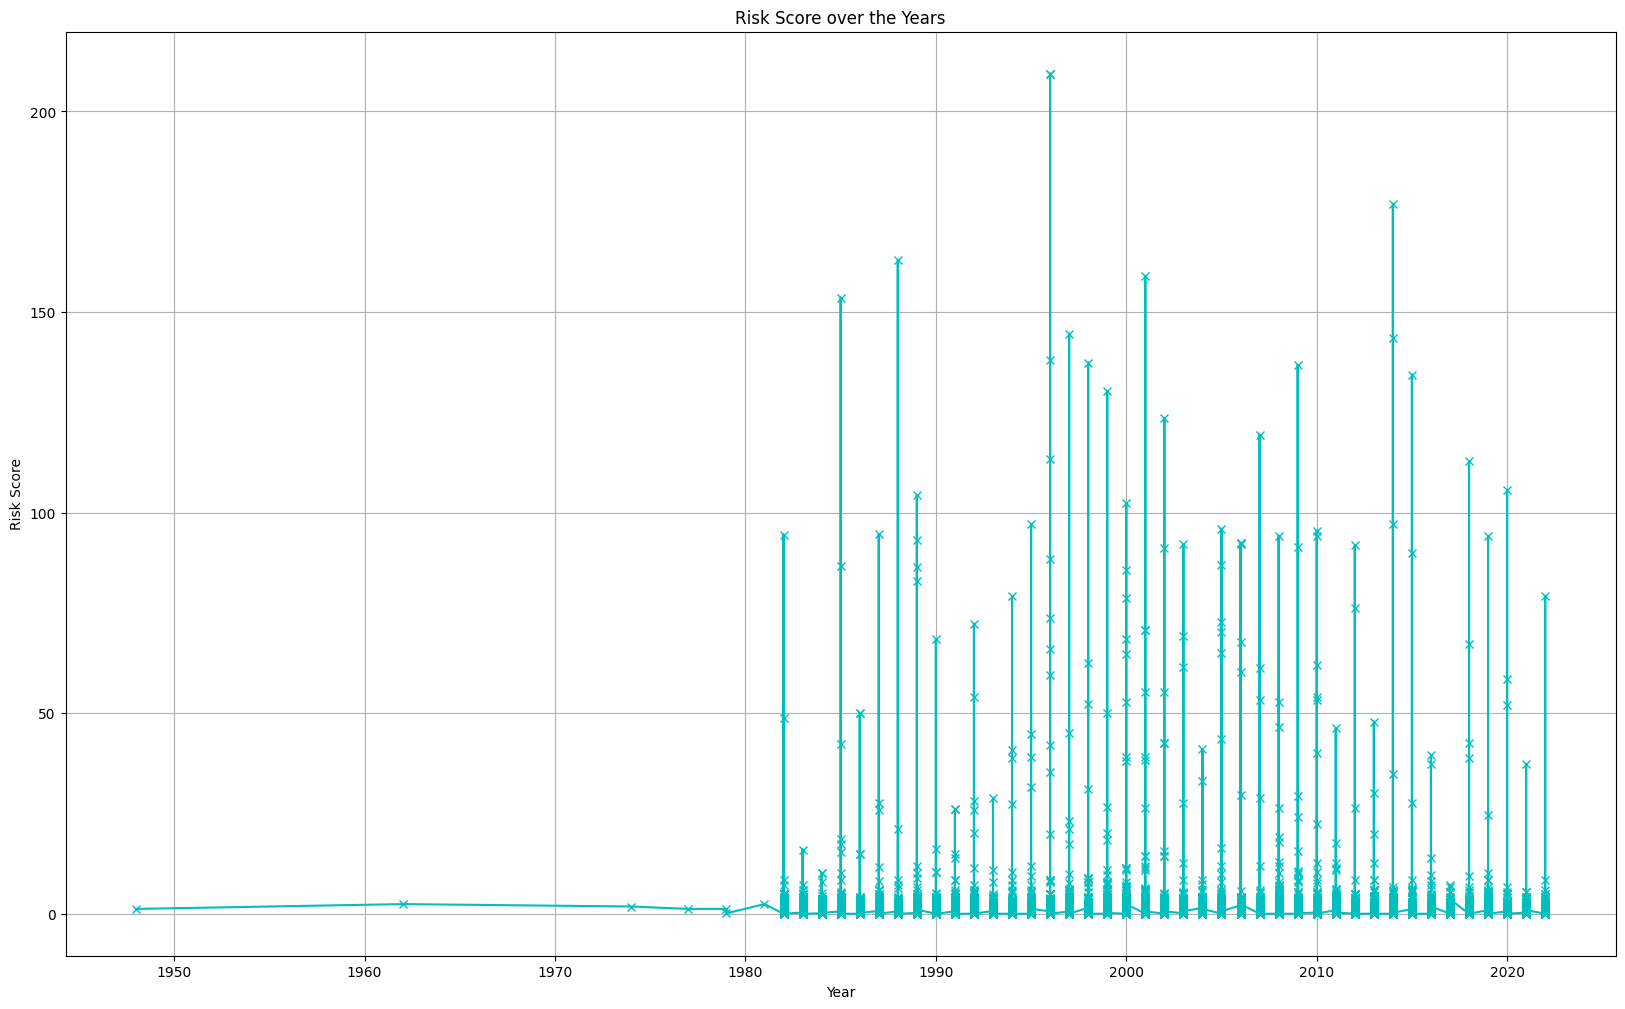

In [45]:
fig, ax = plt.subplots(figsize=(20, 12))
ax.plot(aviation_df["year"], aviation_df["risk_score"], color="c", linestyle="solid", marker="x")

ax.set_title("Risk Score over the Years")  #  title method
ax.set_xlabel("Year")                        # x-axis label
ax.set_ylabel("Risk Score")                  # y-axis label
ax.grid(True) 

plt.show()

Before 1982, no incidents were recorded, likely due to incomplete data. In the mid-1980s, incidents peaked, possibly due to a surge in aviation activity or improved reporting. From the late 1980s to the early 2000s, incidents gradually declined, indicating advancements in safety and regulatory measures. After 2000, the number of incidents stabilized, reflecting a more mature and controlled aviation environment.
These trends highlight significant periods for investigating incident causes and opportunities for safety improvements.

### Assess the Risk Scores in Relation to Wheather conditions

In [46]:
#

In [47]:
#plotting a bar chart to figure out the risk score in relation to wheather condition
# fixing the unique values in weather conditions and replacing the UNK, unk with unknown
aviation_df["weather-condition"] = aviation_df["weather-condition"].replace(["UNK", "unknown", "unk"], "Unknown")
aviation_df["weather-condition"] 


C:\Users\Damaris\AppData\Local\Temp\ipykernel_9800\3202531050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_df["weather-condition"] = aviation_df["weather-condition"].replace(["UNK", "unknown", "unk"], "Unknown")


0        Unknown
1        Unknown
2            IMC
3            IMC
4            VMC
          ...   
88884    Unknown
88885    Unknown
88886        VMC
88887    Unknown
88888    Unknown
Name: weather-condition, Length: 88371, dtype: object

In [48]:
weather = aviation_df["weather-condition"].value_counts()

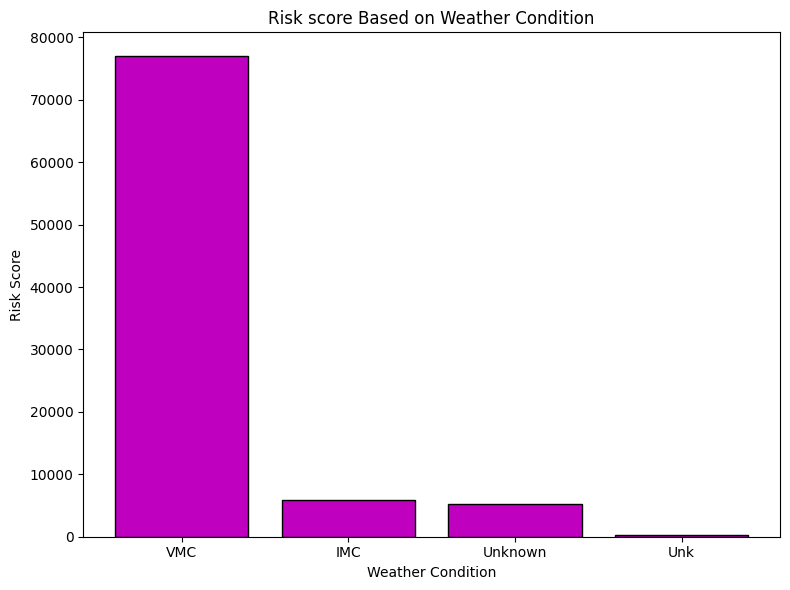

In [49]:
#plotting a bar chart to figure out the risk score in relation to wheather condition
plt.figure(figsize=(8, 6))
plt.bar(weather.index, weather.values,color="m", edgecolor='k')
plt.xlabel("Weather Condition")     
plt.ylabel("Risk Score")
plt.title("Risk score Based on Weather Condition")
plt.xticks(rotation=0)  
plt.tight_layout()
plt.show()

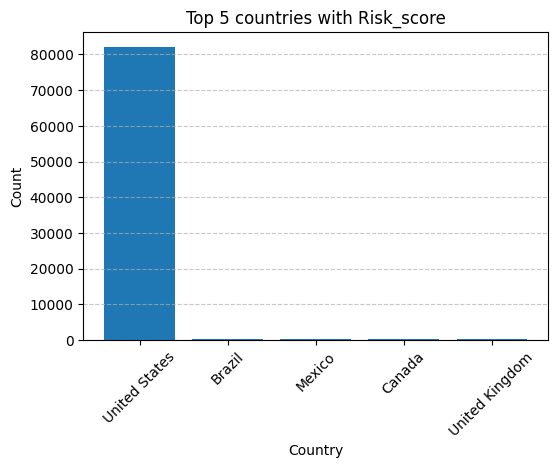

In [50]:
### Location

# look at top ten states with most accidents 
top_5_countries = aviation_df["country"

].value_counts().head()


plt.figure(figsize=(6, 4))
bars = plt.bar(top_5_countries.index, top_5_countries.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 5 countries with Risk_score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Risk Assessment Based On Number of Engines of the Aircraft

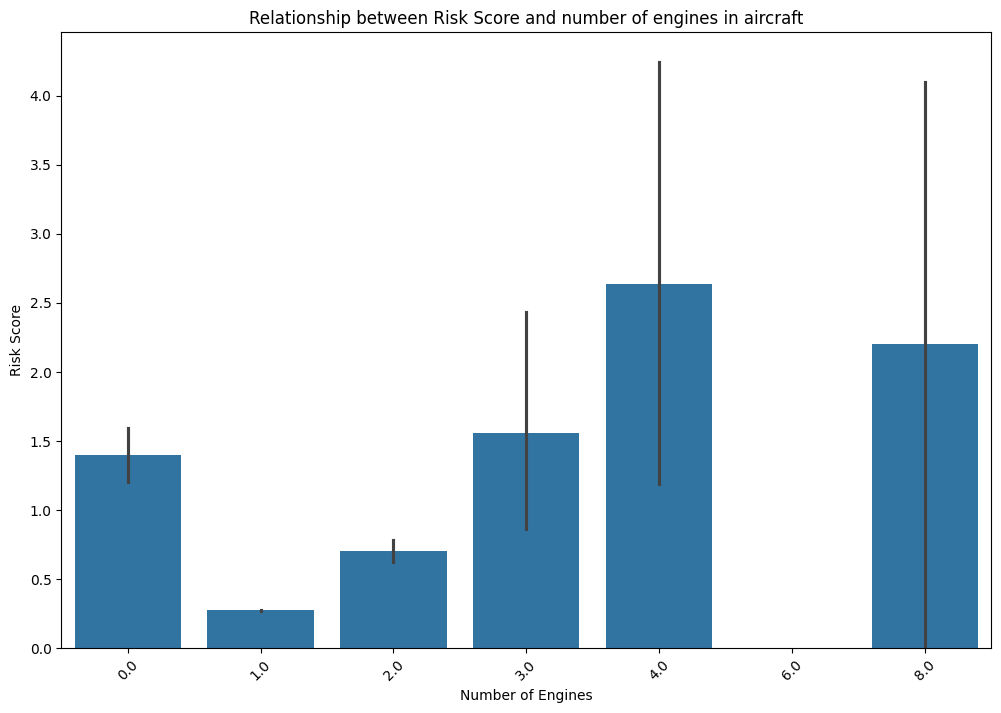

In [51]:
plt.figure(figsize=(12,8))
sns.barplot(x="number-of-engines", y= "risk_score", data = aviation_df)
plt.title("Relationship between Risk Score and number of engines in aircraft")
plt.xlabel("Number of Engines")
plt.ylabel("Risk Score")
plt.xticks(rotation=45)
plt.show()

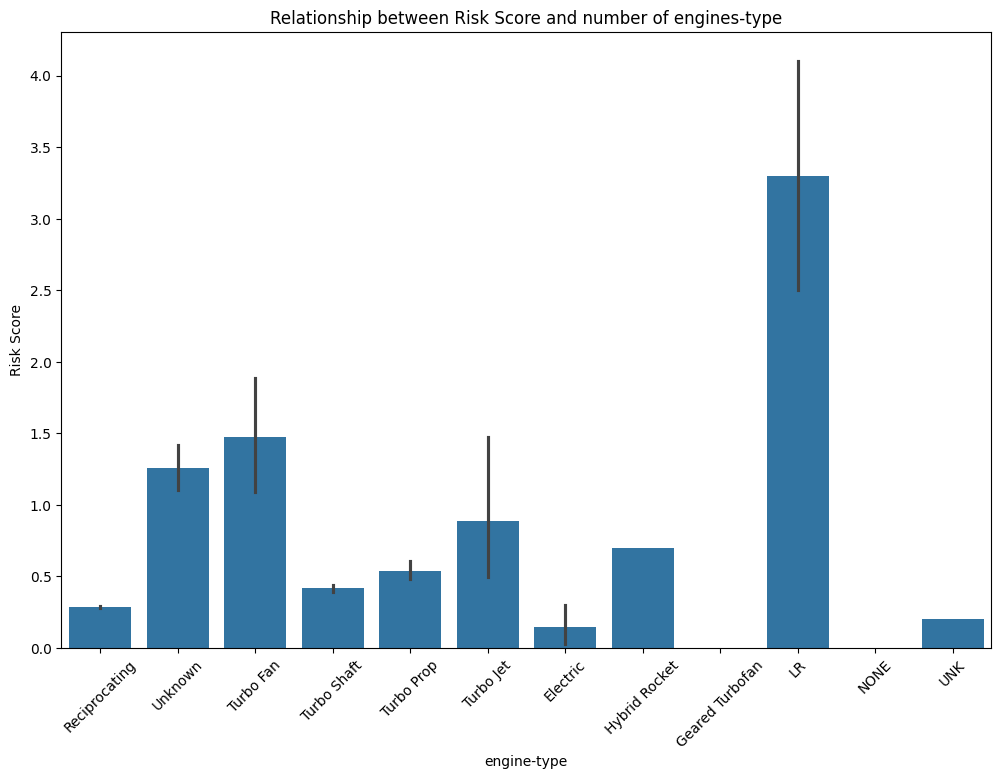

In [52]:
plt.figure(figsize=(12,8))
sns.barplot(x="engine-type", y= "risk_score", data = aviation_df)
plt.title("Relationship between Risk Score and number of engines-type")
plt.xlabel("engine-type")
plt.ylabel("Risk Score")
plt.xticks(rotation=45)
plt.show()

### Risk Evaluation in Relation to Flight Phase

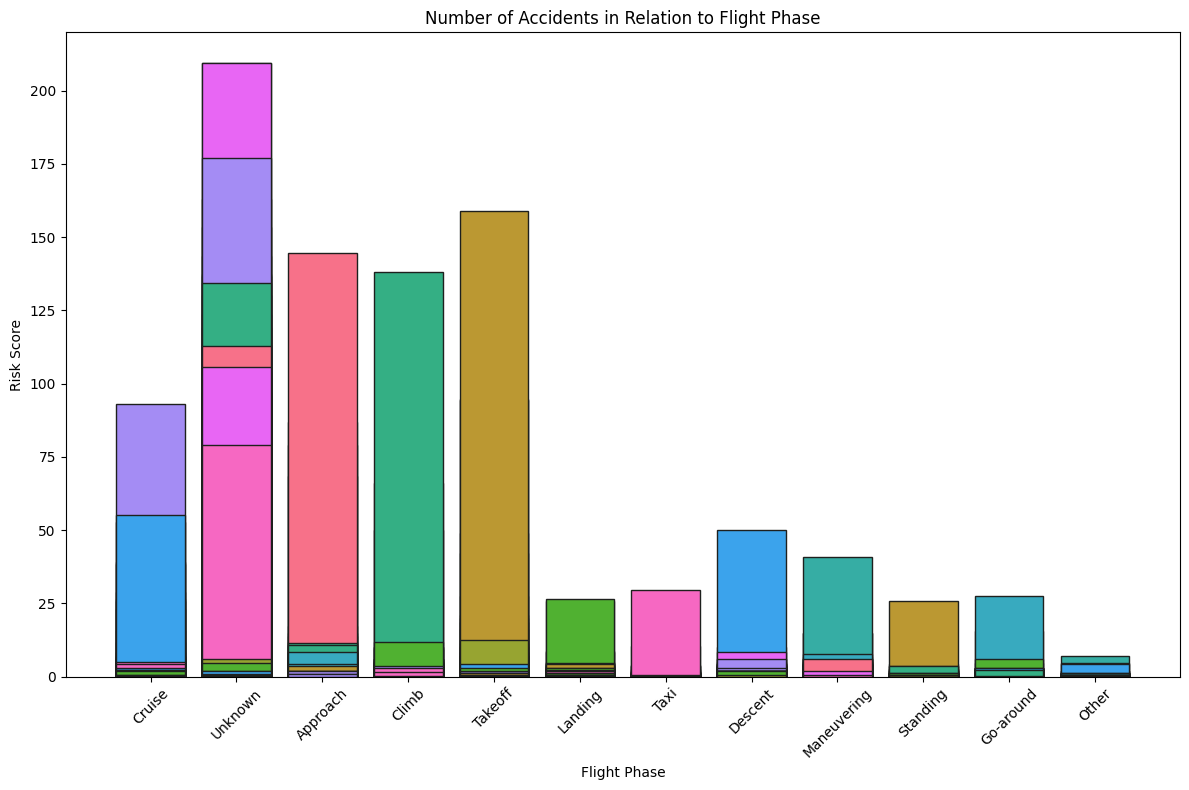

In [56]:
# Number risk in regards to  Flight Phase
plt.figure(figsize=(12, 8))

# Use seaborn color palette for multiple colors
colors = sns.color_palette("husl", len(aviation_df["broad-phase-of-flight"].unique()))

# Plotting the bar chart with different colors for each bar
plt.bar(aviation_df["broad-phase-of-flight"], aviation_df["risk_score"], color=colors, edgecolor='#1E201E')

plt.xlabel('Flight Phase')
plt.ylabel('Risk Score')
plt.title('Number of Accidents in Relation to Flight Phase')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()

In [57]:
grouped_risk_score = aviation_df.groupby(['make', 'model']).agg({'risk_score': 'mean'}).reset_index()
grouped_risk_score

,make,model,risk_score
0,107.5 flying corporation,One Design DR 107,0.6
1,1200,G103,0.3
2,177mf llc,PITTS MODEL 12,0.6
3,1977 colfer-chan,STEEN SKYBOLT,0.1
4,1st ftr gp,FOCKE-WULF 190,0.6
...,...,...,...
18405,Zubair s khan,RAVEN,0.6
18406,Zuber thomas p,ZUBER SUPER DRIFTER,0.0
18407,Zukowski,EAA BIPLANE,0.0
18408,Zwart,KIT FOX VIXEN,0.0


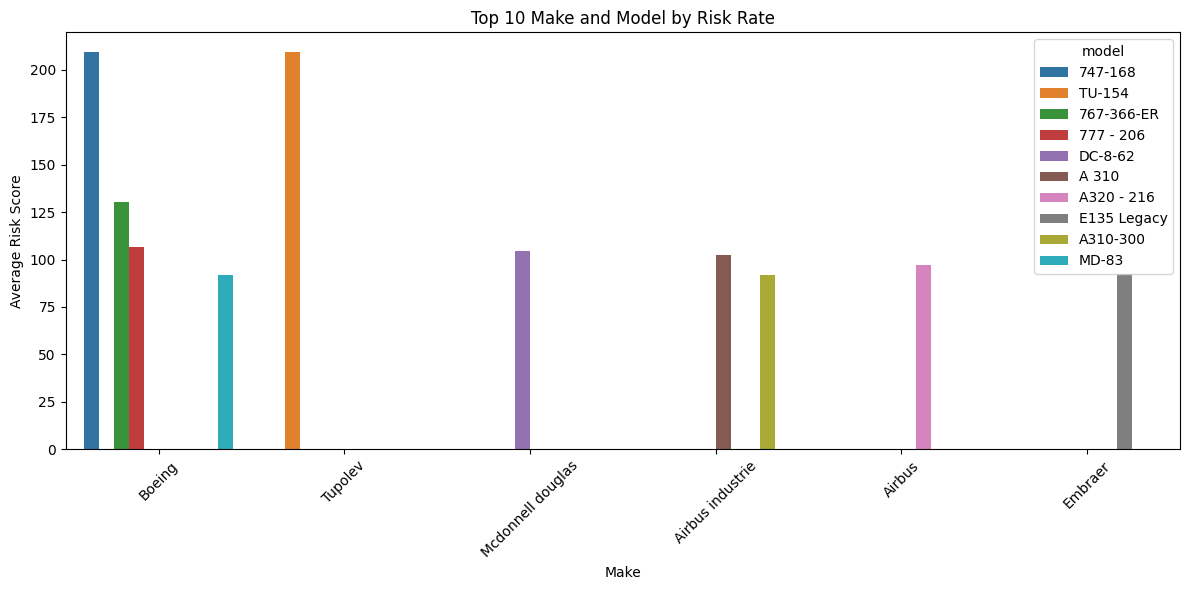

In [58]:

# Plotting
top_grouped_risk_score = grouped_risk_score.nlargest(10, 'risk_score')
plt.figure(figsize=(12, 6))
sns.barplot(x='make', y='risk_score', hue='model', data=top_grouped_risk_score)
plt.title('Top 10 Make and Model by Risk Rate')
plt.ylabel('Average Risk Score')
plt.xlabel('Make')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Based on the graph, the top 3 makes with the lowest average risk rates are

*Cessna
*Piper
*Rockwell

For models, Cessna 172M stands out as a recommended model due to its consistently lower risk
rate. These make and model combinations would be great recommendations for the company based on safety data.